## Business Problem
High Cancellation rates leading to less revenue

## Research Question
1. What are variables that affect hotel cancellation rates?
2. How can we reduce Hotel cancellation rates?
3. How will hotels be assisted in making pricing and promotional decisions?

## Hypothesis

1. More cancellations occur when prices are higher
2. Longer waiting list- leads to more cancellations
3. Majority clients are coming from offline travel agents

# Uploading libraries

In [8]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Loading Data set

In [9]:
df = pd.read_csv('hotel_bookings_2.csv')

# Data Cleaning

In [10]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,3/7/2015
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,3/7/2015
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,6/5/2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,22/4/2015


In [11]:
df.tail(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119380,City Hotel,0,44,2017,August,35,31,1,3,2,...,No Deposit,9.0,NaN,0,Transient,140.75,0,1,Check-Out,4/9/2017
119381,City Hotel,0,188,2017,August,35,31,2,3,2,...,No Deposit,14.0,NaN,0,Transient,99.00,0,0,Check-Out,5/9/2017
119382,City Hotel,0,135,2017,August,35,30,2,4,3,...,No Deposit,7.0,NaN,0,Transient,209.00,0,0,Check-Out,5/9/2017
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,No Deposit,42.0,NaN,0,Transient,87.60,0,0,Check-Out,6/9/2017
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,2,Check-Out,6/9/2017
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,7/9/2017


In [12]:
#finding shape of data set
df.shape

(119390, 32)

In [13]:
#finding stats of numerical data 
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [15]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

<AxesSubplot:>

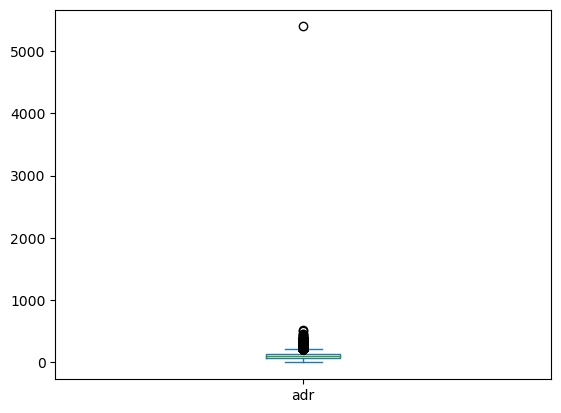

In [17]:
#plotting a box graph to confirm outliers

df['adr'].plot(kind = 'box')

<AxesSubplot:>

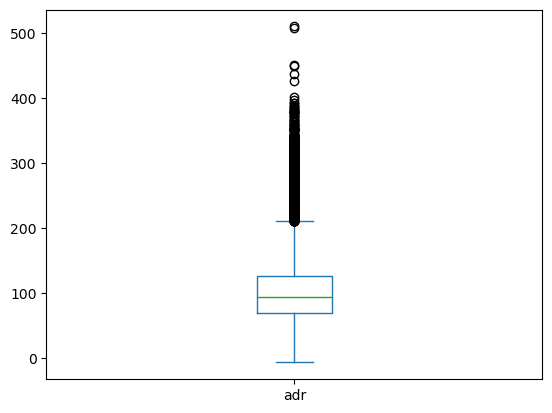

In [18]:
# re- creating a column that has the outlier removed- by showing the new column has less than 5000
df = df[df['adr'] < 5000]
df['adr'].plot(kind = 'box')

In [19]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119385.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,103049.000000,6797.000000,119389.000000,119389.000000,119389.000000,119389.000000
mean,0.370411,104.011994,2016.156555,27.165292,15.798164,0.927606,2.500314,1.856402,0.103891,0.007949,0.031912,0.087119,0.137098,0.221118,86.694107,189.266735,2.321169,101.786744,0.062518,0.571368
std,0.482917,106.863358,0.707479,13.605134,8.780826,0.998614,1.908289,0.579263,0.398563,0.097437,0.175768,0.844340,1.497443,0.652304,110.774841,131.655015,17.594793,48.153554,0.245292,0.792800
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.560000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,510.000000,8.000000,5.000000


In [20]:
#getting stats data about obect type data- qualitative
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119389,119389,119389,118901,119389,119389,119389,119389,119389,119389,119389
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79329,13877,92309,48589,56477,97869,85993,74052,104641,89612,75166


In [21]:
# finding unique value sof object data of all object columns
#using for loop to do it

for col in df.describe(include = 'object').columns:
    print(col);
    print(df[col].unique());
    print('-'*50);
    

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [22]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [23]:
df.drop(['agent', 'company'], axis = 1, inplace = True)


In [24]:
df.isnull().sum()


hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

# Data Analysis & Visualisations

In [25]:
#how much is cancellation percentage in total
# using value_counts to find % 

canc_perc = df['is_canceled'].value_counts(normalize = True)*100
canc_perc

0    62.958899
1    37.041101
Name: is_canceled, dtype: float64

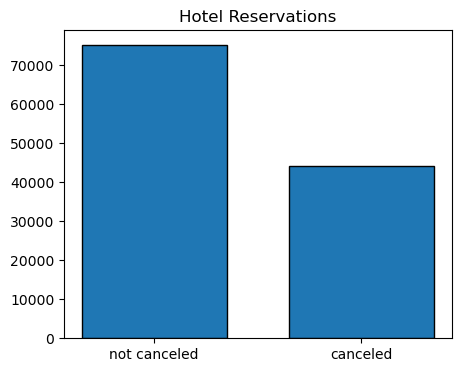

In [26]:
#plot a graph to visualise the cancellations

plt.figure(figsize = (5,4))
plt.title('Hotel Reservations')
plt.bar(['not canceled', 'canceled'], df['is_canceled'].value_counts(), edgecolor = 'k', width = 0.7)
plt.show()

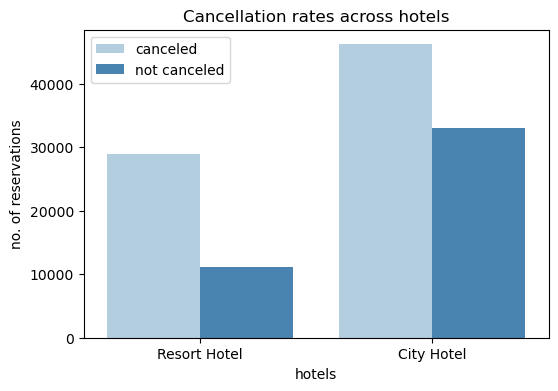

In [58]:
#Let's figure out how are cancellation rates across the 2 diff types of hotels

plt.figure(figsize = (6,4))
plt.title('Cancellation rates across hotels')
ax1 = sn.countplot(x= 'hotel', hue = 'is_canceled', data = df, palette = "Blues");
plt.xlabel('hotels')
plt.ylabel('no. of reservations')
legend_labels,_ = ax1.get_legend_handles_labels() #get clarity
ax1.legend(bbox_to_anchor = (1,1)) #get clarity
plt.legend(['canceled' , 'not canceled'])

plt.show()


In [28]:
#finding cancellationn % of individual hotels

resort_hotel = df[df['hotel'] == 'Resort Hotel']
print(resort_hotel['is_canceled'].value_counts( normalize = True))

city_hotel = df[df['hotel'] == 'City Hotel']
print(city_hotel['is_canceled'].value_counts( normalize = True))

0    0.722366
1    0.277634
Name: is_canceled, dtype: float64
0    0.582738
1    0.417262
Name: is_canceled, dtype: float64


In [29]:
#check if price affects the cancellation rate sin these 2 diff types of hotels
#grouping by reservation date - we will check 'average daily rate'
#WE ARE GROUPING BECAUSE ON ONE DAY THERE MIGH BE LOT OF RECORDS

resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

In [30]:
print(resort_hotel)
print(city_hotel)

                                adr
reservation_status_date            
2014-11-18                 0.000000
2015-01-01                61.966667
2015-01-05               115.363333
2015-01-06               133.677143
2015-01-07                82.485455
...                             ...
2017-12-05               103.287534
2017-12-06               159.808929
2017-12-07               160.306275
2017-12-08               212.767222
2017-12-09               153.570000

[913 rows x 1 columns]
                                adr
reservation_status_date            
2014-10-17                62.800000
2015-01-01                62.063158
2015-01-05                58.900000
2015-01-06                69.216667
2015-01-07                82.877500
...                             ...
2017-12-04               128.755465
2017-12-05               124.544536
2017-12-06               132.725882
2017-12-07               130.473617
2017-12-08               142.949080

[864 rows x 1 columns]


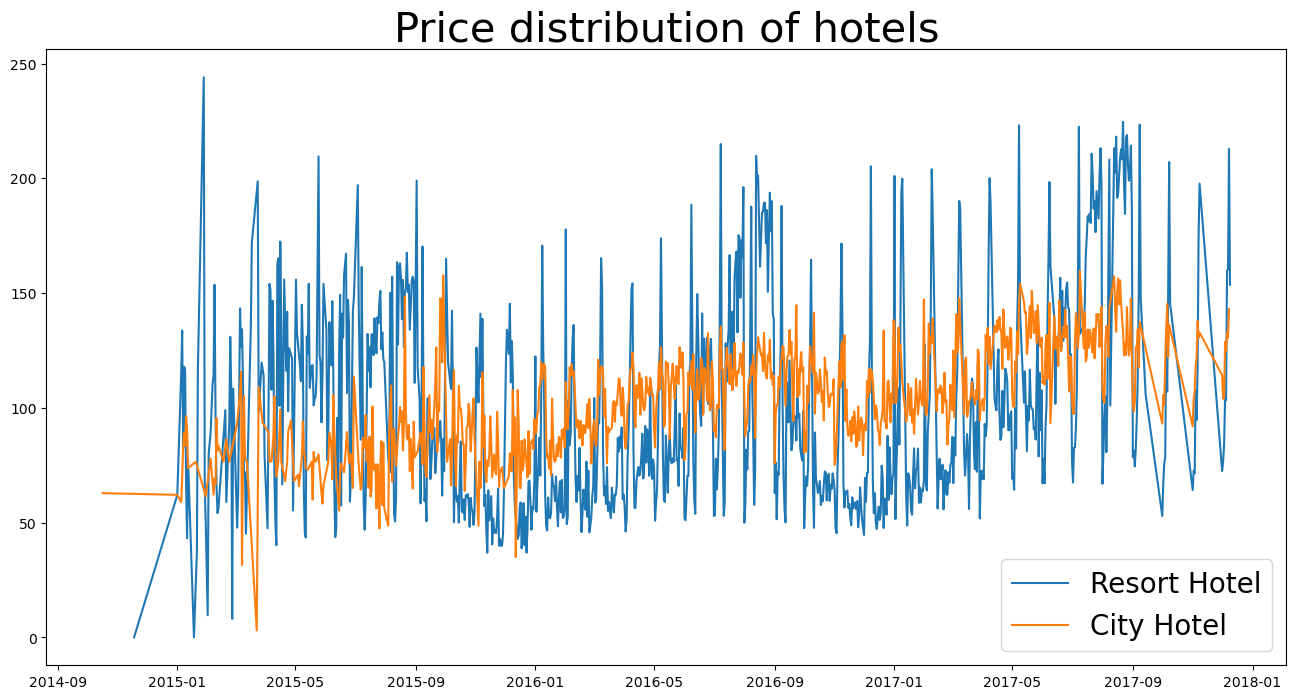

In [57]:
#we are testing our hypothesis: Lets check if pricing plays a role in cancellation

plt.figure(figsize= (16,8))
plt.title('Price distribution of hotels', fontsize = 30)
plt.plot(resort_hotel.index, resort_hotel[['adr']], label = 'Resort Hotel')
plt.plot(city_hotel.index, city_hotel[['adr']], label = 'City Hotel')
plt.legend(fontsize = 20)
plt.show()


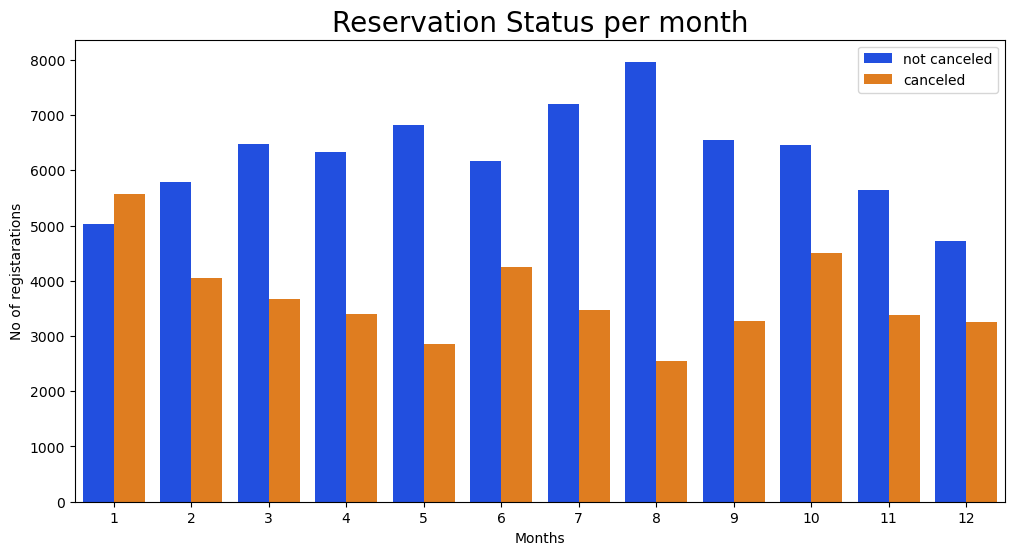

In [32]:
#extracting month from reservation status date

df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize= (12,6))
plt.title('Reservation Status per month', size = 20)
ax1 = sn.countplot(x='month', hue = 'is_canceled', data = df, palette = 'bright')
plt.xlabel('Months')
plt.ylabel('No of registarations')
legend_labels,_ = ax1.get_legend_handles_labels() #get clarity
ax1.legend(bbox_to_anchor = (1,1))
plt.legend(['not canceled', 'canceled'])
plt.show()

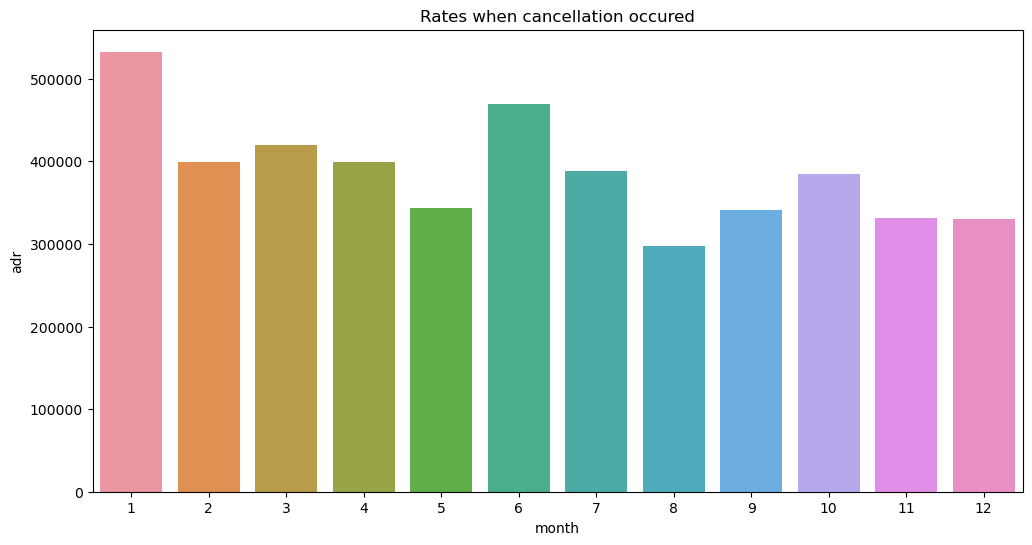

In [33]:
# figuring out the prices by looking at the adr when cancelleations were done
#using data which is specific from cancellation data
# plotting it by months vs adr

# What we are tryying to figure out- if cancellations are happening 


plt.figure(figsize = (12,6))
plt.title('Rates when cancellation occured')
sn.barplot('month', 'adr', data = df[df['is_canceled']== 1].groupby('month')[['adr']].sum().reset_index())
plt.show()

#### This shows January had high prices and hence might be contributing to higher cancellations

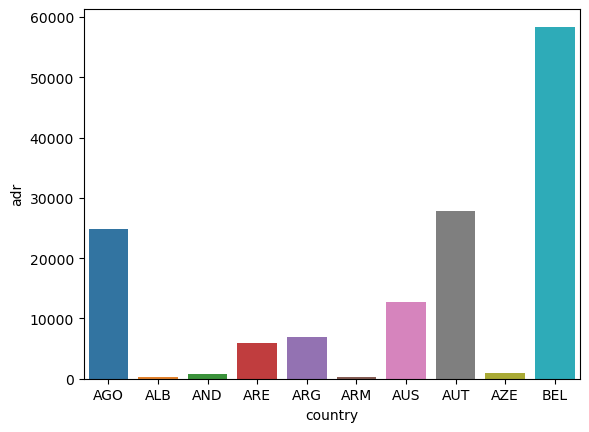

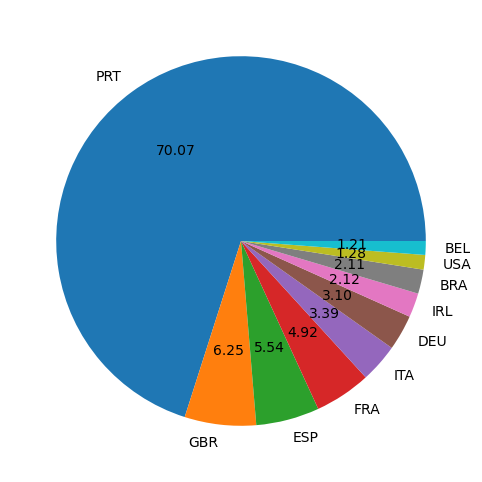

In [34]:
#Creating data set of cancelled data 

canceled_data = df[df['is_canceled'] == 1]
top_10_countries = canceled_data['country'].value_counts()[:10]
sn.barplot('country', 'adr', data = df[df['is_canceled']== 1].groupby('country')[['adr']].sum().reset_index()[:10])
plt.figure(figsize = (12,6))
plt.pie(top_10_countries, autopct = '%.2f' , labels = top_10_countries.index)
plt.show()

In [35]:
#finding via which medium is customer is coming to hotel
df['market_segment'].value_counts(normalize = True)

Online TA        0.473050
Offline TA/TO    0.202850
Groups           0.165937
Direct           0.105588
Corporate        0.044351
Complementary    0.006223
Aviation         0.001985
Undefined        0.000017
Name: market_segment, dtype: float64

In [36]:
canceled_data['market_segment'].value_counts(normalize = True)

Online TA        0.468964
Groups           0.273545
Offline TA/TO    0.187911
Direct           0.043733
Corporate        0.022432
Complementary    0.002193
Aviation         0.001176
Undefined        0.000045
Name: market_segment, dtype: float64

In [37]:
#check 

In [38]:
?reset_index()

Object `reset_index()` not found.


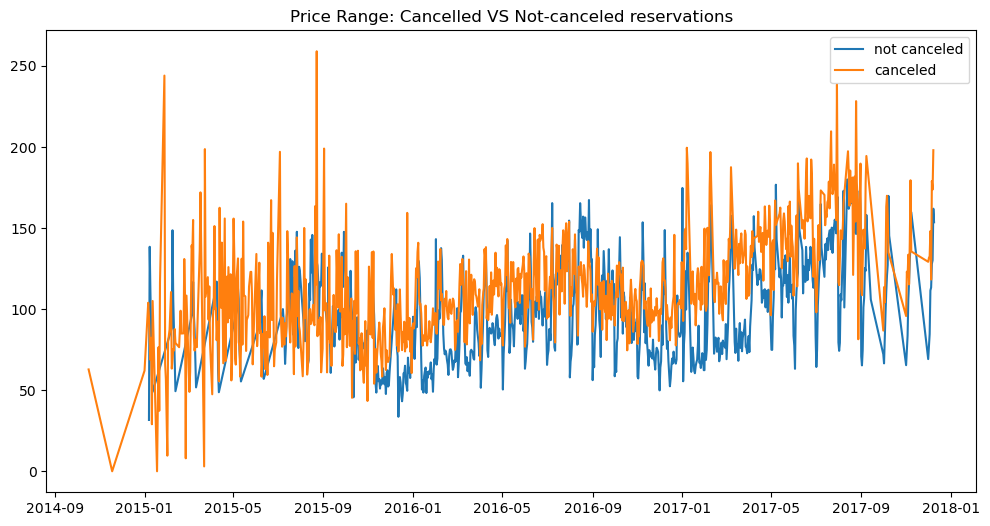

In [59]:
#finding the prices in cancelled reservations and not-cancelled reservations
#comparing the two - to figure out if cancellations  were becuase of the high prices

canceled_data = df[df['is_canceled'] == 1]
canceled_data_adr = canceled_data.groupby('reservation_status_date')[['adr']].mean()
canceled_data_adr.reset_index(inplace = True)
canceled_data_adr.sort_values('reservation_status_date', inplace = True)

not_canceled_data = df[df['is_canceled'] == 0]
not_canceled_data_adr = not_canceled_data.groupby('reservation_status_date')[['adr']].mean()
not_canceled_data_adr.reset_index(inplace = True)
not_canceled_data_adr.sort_values('reservation_status_date', inplace = True)

#plot

plt.figure(figsize= (12,6))
plt.title('Price Range: Cancelled VS Not-canceled reservations')
plt.plot(not_canceled_data_adr['reservation_status_date'],not_canceled_data_adr['adr'], label = 'not canceled')
plt.plot(canceled_data_adr['reservation_status_date'],canceled_data_adr['adr'], label = 'canceled')
plt.legend();

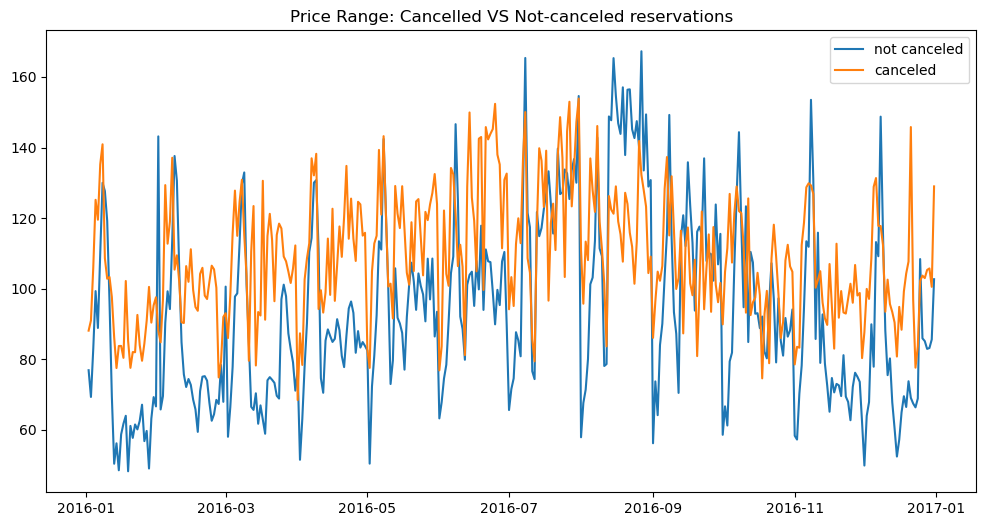

In [55]:
## look at the inconsistency- before 2015 and after 2017- lets remove it

canceled_data_adr = canceled_data_adr[(canceled_data_adr['reservation_status_date']> '2016') & (canceled_data_adr['reservation_status_date'] < '2017')]
not_canceled_data_adr = not_canceled_data_adr[(not_canceled_data_adr['reservation_status_date']>'2016') & (not_canceled_data_adr['reservation_status_date']< '2017')]

plt.figure(figsize= (12,6))
plt.title('Price Range: Cancelled VS Not-canceled reservations')
plt.plot(not_canceled_data_adr['reservation_status_date'],not_canceled_data_adr['adr'], label = 'not canceled')
plt.plot(canceled_data_adr['reservation_status_date'],canceled_data_adr['adr'], label = 'canceled')
plt.legend();